# Dense layer from scratch

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
!pip install mitdeeplearning
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self,n_output_nodes):
        super(MyDenseLayer,self).__init__()
        self.n_output_nodes = n_output_nodes

        #initilize the w and b
        
    #calling the perceptron 
    def build(self,input_shape):
        d = int(input_shape[-1])
        self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # note the dimensionality
        self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) 
    
    def call(self,inputs):
        z=tf.matmul(inputs,self.W)+self.b
        output=tf.math.sigmoid(z)
        return output

# Dense layer using tf framework

In [3]:
layer=tf.keras.layers.Dense(units=2)

# loss

In [4]:
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y,predicted))
loss=tf.keras.losses.MSE(y,predicted)

NameError: name 'y' is not defined

In [ ]:
optimizer=tf.keras.optimizers.SGD()
while True:
    prediction=model(x)
    with tf.GradientTape() as tape:
        loss = compute_loss(y,prediction)
    grads=tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(grads,model.trainable_variables))

# Here realworks begin 

In [5]:
tf.random.set_seed(1)
layer = MyDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the output!
print(y.numpy())
#mdl.lab1.test_custom_dense_layer_output(y)

[[0.26978594 0.45750415 0.66536945]]


<b>### Defining a neural network using the Sequential API ### </b>

In [6]:
n_output_nodes = 3 #nuber of output
model = Sequential() #definind sequential model
dense_layer = Dense(n_output_nodes, activation='sigmoid') # TODO #dense layer
model.add(dense_layer)





In [7]:
x_input = tf.constant([[1,2.]], shape=(1,2))

'''TODO: feed input into the model and predict the output!'''
model_output = model(x_input).numpy()
# model_output = # TODO
print(model_output)

[[0.5607363  0.65668976 0.12496966]]


# Sub class model 

In [12]:
class SubclassModel(tf.keras.Model):
    def __init__(self,n_output_nodes):
        super(SubclassModel,self).__init__()
        self.dense_layer=Dense(n_output_nodes,activation='sigmoid')
    def call(self,inputs):
        return self.dense_layer(inputs)
    

Just like the model we built using the `Sequential` API, let's test out our `SubclassModel` using an example input.



In [14]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input))

tf.Tensor([[0.29996255 0.62776643 0.48460072]], shape=(1, 3), dtype=float32)


Importantly, Subclassing affords us a lot of flexibility to define custom models. For example, we can use boolean arguments in the `call` function to specify different network behaviors, for example different behaviors during training and inference. Let's suppose under some instances we want our network to simply output the input, without any perturbation. We define a boolean argument `isidentity` to control this behavior:

<h3>Identity model </h3>

In [16]:
class IdentityModel(tf.keras.Model):
    def __init__(self,n_output_nodes):
        super(IdentityModel,self).__init__()
        self.dense_layer=tf.keras.layers.Dense(n_output_nodes,activation='sigmoid')
    def call(self,inputs,isidentity=False):
        x=self.dense_layer(inputs)
        if isidentity:
            return inputs
        return x


In [17]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
'''TODO: pass the input into the model and call with and without the input identity option.'''
out_activate = model.call(x_input) # TODO
# out_activate = # TODO
out_identity = model.call(x_input, isidentity=True) # TODO
# out_identity = # TODO

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

Network output with activation: [[0.1969584 0.6330007 0.7668015]]; network identity output: [[1. 2.]]


## 1.4 Automatic differentiation in TensorFlow

[Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation)
is one of the most important parts of TensorFlow and is the backbone of training with 
[backpropagation](https://en.wikipedia.org/wiki/Backpropagation). We will use the TensorFlow GradientTape [`tf.GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape?version=stable) to trace operations for computing gradients later. 

When a forward pass is made through the network, all forward-pass operations get recorded to a "tape"; then, to compute the gradient, the tape is played backwards. By default, the tape is discarded after it is played backwards; this means that a particular `tf.GradientTape` can only
compute one gradient, and subsequent calls throw a runtime error. However, we can compute multiple gradients over the same computation by creating a ```persistent``` gradient tape. 

First, we will look at how we can compute gradients using GradientTape and access them for computation. We define the simple function $ y = x^2$ and compute the gradient:

## concepts of Gradient tape

In [19]:
### Gradient computation with GradientTape ###

x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

Initializing x=[[-0.8340743]]


Text(0, 0.5, 'x value')

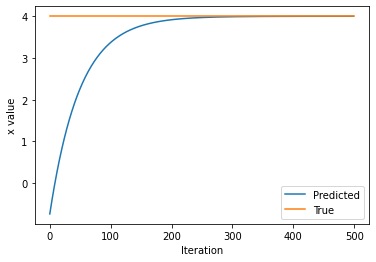

In [26]:
### Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss, 
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss = (x - x_f)**2 # "forward pass": record the current loss on the tape
    # loss = # TODO

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')